### Testing with polynomial regression

In [61]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

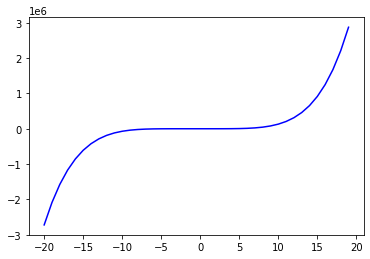

In [62]:
n = 5 # degree of the polynomial

roots = np.random.uniform(-2, 3, n) # Generates random roots for a 5th degree polynomial
polyCoefficients = np.poly(roots) # Find coefficients of polynomial that has said roots

x = np.arange(-20, 20) # Randomly generated X values
y = np.polyval(polyCoefficients, x) # Corresponding Y values passed through polynomial

plt.plot(x, y, 'blue')
plt.show()

In [63]:
alpha = 0.05
epochs = 200
m = len(x)
errors = []

x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [64]:
X = tf.placeholder(tf.float32, shape=[None, 1], name='x-input')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='y-input')

theta = tf.Variable(tf.zeros([1, 1]))
b = tf.Variable(0.0)

model = tf.matmul(X, theta) + b

cost = tf.reduce_sum(tf.square(Y-model))/(2*m)

optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(cost)

init = tf.global_variables_initializer()

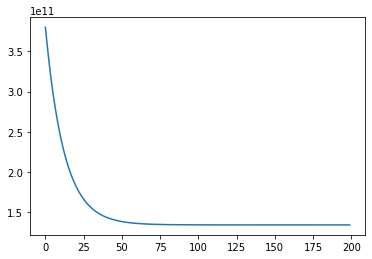

R2 Correlation:  0.6730799082819242


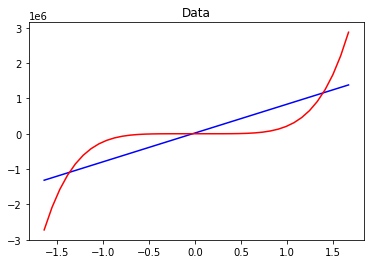

In [65]:
with tf.Session() as sess:
  sess.run(init)
  for i in range(epochs):
    sess.run(optimizer, feed_dict={X:x_train, Y:y_train})
    loss = sess.run(cost, feed_dict={X:x_train, Y:y_train})
    errors.append(loss)
  theta, b = sess.run(theta), sess.run(b)

plt.plot(list(range(epochs)), errors)
plt.show()

x = scaler.transform(x)
pred = theta * x + b

print("R2 Correlation: ", r2(y, pred))

plt.plot(x, pred, 'blue')
plt.plot(x, y, 'red')
plt.title("Data")
plt.show()

In [66]:
alpha = 0.01
epochs = 200
m = len(x)
errors = []

predDegree = 5

x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

X = tf.placeholder(tf.float32, shape=[None, 1], name='x-input')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='y-input')

theta_1 = tf.Variable(tf.zeros([1, 1]))
theta_2 = tf.Variable(tf.zeros([1, 1]))
theta_3 = tf.Variable(tf.zeros([1, 1]))
theta_4 = tf.Variable(tf.zeros([1, 1]))
theta_5 = tf.Variable(tf.zeros([1, 1]))
theta_6 = tf.Variable(tf.zeros([1, 1]))

model = tf.matmul(tf.pow(X, 5), theta_1) + tf.matmul(tf.pow(X, 4), theta_2) + tf.matmul(tf.pow(X, 3), theta_3) + tf.matmul(tf.pow(X, 2), theta_3) +tf.matmul(X, theta_5) + theta_6

cost = tf.reduce_sum(tf.square(Y-model))/(2*m)

optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(cost)

init = tf.global_variables_initializer()

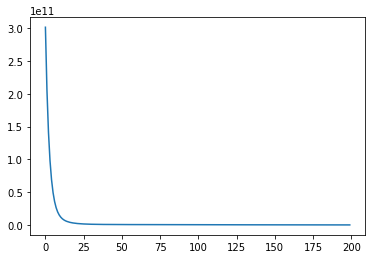

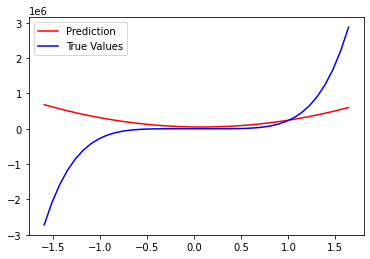

R2 Correlation:  -0.13479276289159414


In [67]:
with tf.Session() as sess:
  sess.run(init)
  for i in range(epochs):
    sess.run(optimizer, feed_dict={X:x_train, Y:y_train})
    loss = sess.run(cost, feed_dict={X:x_train, Y:y_train})
    errors.append(loss)
  theta1, theta2, theta3 = sess.run([theta_1, theta_2, theta_3])

plt.plot(list(range(epochs)), errors)
plt.show()

x = scaler.transform(x)
pred = theta1 * x**2 + theta2 * x + theta3

plt.plot(x, pred, 'red', label="Prediction")
plt.plot(x, y, 'blue', label="True Values")
plt.legend()
plt.show()

print("R2 Correlation: ", r2(y, pred))